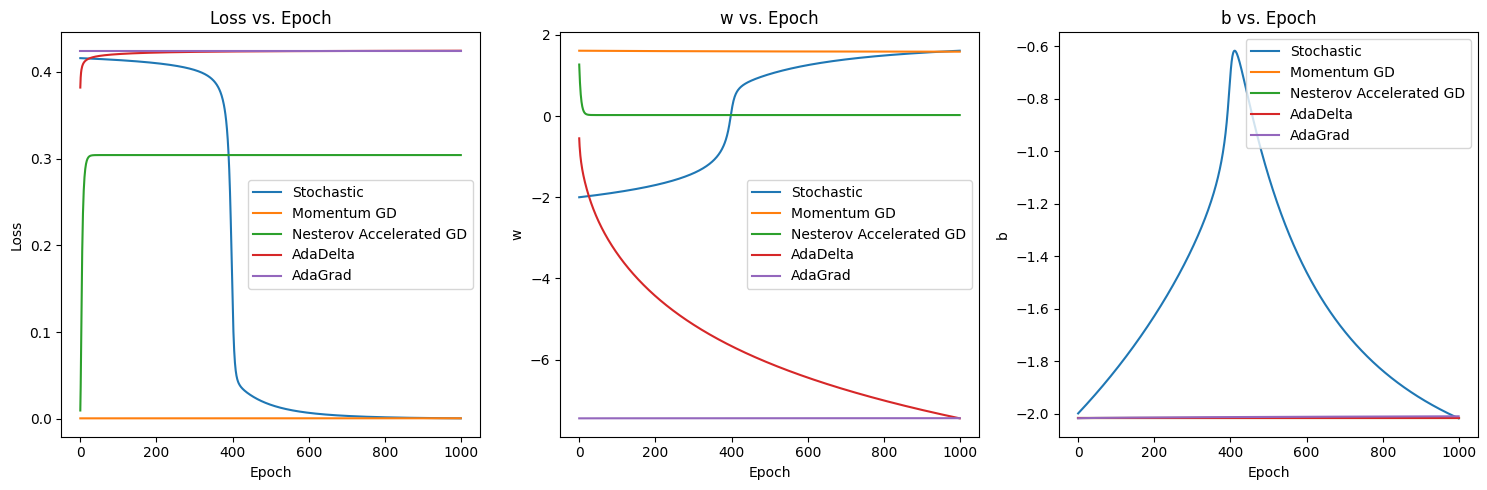

In [1]:
import numpy as np
import matplotlib.pyplot as plt

X = [0.5, 2.5]
Y = [0.2, 0.9]
epoch = 1000
n = 0.2
m = 0.9
e = 0.001
w = -2
b = -2

def gd_w(w, b, x, y):
    fx = f(w, b, x)
    return (fx - y) * fx * (1 - fx) * x

def gd_b(w, b, x, y):
    fx = f(w, b, x)
    return (fx - y) * fx * (1 - fx)

def f(w, b, x):
    return 1.0 / (1.0 + np.exp(-(w * x + b)))

def error(w, b):
    error = 0
    for x, y in zip(X, Y):
        fx = f(w, b, x)
        error += 0.5 * (fx - y) ** 2
    return error

def stochastic():
    global w, b
    w_values = []
    b_values = []
    loss_values = []

    for i in range(epoch):
        dw, db = 0, 0
        for x, y in zip(X, Y):
            dw = gd_w(w, b, x, y)
            db = gd_b(w, b, x, y)
            w = w - n * dw
            b = b - n * db
        w_values.append(w)
        b_values.append(b)
        loss = error(w, b)
        loss_values.append(loss)

    return w_values, b_values, loss_values

def mom_gd():
    global w, b
    w_values = []
    b_values = []
    loss_values = []
    vw = 0

    for i in range(epoch):
        dw, db, vw = 0, 0, 0
        for x, y in zip(X, Y):
            dw += gd_w(w, b, x, y)
            db += gd_b(w, b, x, y)
            vw = m * vw + (1 - m) * dw
            w = w - n * vw

        w_values.append(w)
        b_values.append(b)
        loss = error(w, b)
        loss_values.append(loss)

    return w_values, b_values, loss_values

def nag():
    global w, b
    w_values = []
    b_values = []
    loss_values = []
    vw, wt, bt = 0, w, b

    for i in range(epoch):
        dw, db, vw, dwt = 0, 0, 0, 0
        vw = m * vw
        wt = w - n * w
        bt = b - n * b
        for x, y in zip(X, Y):
            dwt += gd_w(wt, bt, x, y)
        w = wt - n * (1 - m) * dwt

        w_values.append(w)
        b_values.append(b)
        loss = error(w, b)
        loss_values.append(loss)

    return w_values, b_values, loss_values

def adadelta():
    global w, b
    w_values = []
    b_values = []
    loss_values = []
    vw, vb = 0, 0

    for i in range(epoch):
        dw, db = 0, 0
        for x, y in zip(X, Y):
            dw += gd_w(w, b, x, y)
            db += gd_b(w, b, x, y)
        vw = m * vw + (1 - m) * dw * dw
        w = w + (n / (np.sqrt(vw + e))) * dw

        w_values.append(w)
        b_values.append(b)
        loss = error(w, b)
        loss_values.append(loss)

    return w_values, b_values, loss_values

def adagrad():
    global w, b
    w_values = []
    b_values = []
    loss_values = []
    vw, vb = 0, 0

    for i in range(epoch):
        dw, db = 0, 0
        for x, y in zip(X, Y):
            dw += gd_w(w, b, x, y)
            db += gd_b(w, b, x, y)
        vw = vw + dw**2
        vb = vb + db**2
        w = w - (n / np.sqrt(vw + i + 1)) * dw
        b = b - (n / np.sqrt(vb + i + 1)) * db

        w_values.append(w)
        b_values.append(b)
        loss = error(w, b)
        loss_values.append(loss)

    return w_values, b_values, loss_values

# Run each optimizer and collect the values
w_stochastic, b_stochastic, loss_stochastic = stochastic()
w_mom_gd, b_mom_gd, loss_mom_gd = mom_gd()
w_nag, b_nag, loss_nag = nag()
w_adadelta, b_adadelta, loss_adadelta = adadelta()
w_adagrad, b_adagrad, loss_adagrad = adagrad()

# Plot the results
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.plot(range(epoch), loss_stochastic, label='Stochastic')
plt.plot(range(epoch), loss_mom_gd, label='Momentum GD')
plt.plot(range(epoch), loss_nag, label='Nesterov Accelerated GD')
plt.plot(range(epoch), loss_adadelta, label='AdaDelta')
plt.plot(range(epoch), loss_adagrad, label='AdaGrad')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs. Epoch')
plt.legend()

plt.subplot(1, 3, 2)
plt.plot(range(epoch), w_stochastic, label='Stochastic')
plt.plot(range(epoch), w_mom_gd, label='Momentum GD')
plt.plot(range(epoch), w_nag, label='Nesterov Accelerated GD')
plt.plot(range(epoch), w_adadelta, label='AdaDelta')
plt.plot(range(epoch), w_adagrad, label='AdaGrad')
plt.xlabel('Epoch')
plt.ylabel('w')
plt.title('w vs. Epoch')
plt.legend()

plt.subplot(1, 3, 3)
plt.plot(range(epoch), b_stochastic, label='Stochastic')
plt.plot(range(epoch), b_mom_gd, label='Momentum GD')
plt.plot(range(epoch), b_nag, label='Nesterov Accelerated GD')
plt.plot(range(epoch), b_adadelta, label='AdaDelta')
plt.plot(range(epoch), b_adagrad, label='AdaGrad')
plt.xlabel('Epoch')
plt.ylabel('b')
plt.title('b vs. Epoch')
plt.legend()

plt.tight_layout()
plt.show()
